## Advantage is rolling two d20s and taking the highest roll

In [531]:
import random

def roll_advantage():
    die_one = random.randint(1,20)
    die_two = random.randint(1,20)

    advantage = max(die_one, die_two)

    return advantage


In [532]:
roll_advantage()

19

### The average roll is important! Let's calculate it using maths and then simulate to make sure.

In [533]:
def calculate_average(number_of_sides):
    #scary probability math
    return (1 / (6 * number_of_sides)) * (number_of_sides + 1) * (4 * number_of_sides - 1)

In [534]:
calculate_average(20)

13.825

In [535]:
def simulate(tries):
    sum = 0
    for i in range(tries):
        sum += roll_advantage()
    average = sum / tries
    return average


In [536]:
#roll a hundred thousand advantages
simulate(100000)

13.82316

### So that means to hit a 10 or higher you have the equivalent of a +3.825 right?

In [537]:
#get a function to roll a d20 plus a modifier
def roll_plus(modifier):
    def roll_plus():
        return random.randint(1,20) + modifier
    return roll_plus

In [538]:
#Try to hit a target using whichever rolling tactic and return the hit rate
def simulate_hitting(target, tactic, tries):
    hits = 0
    for i in range(tries):
        if (tactic() >= target):
            hits += 1
    return hits/tries

In [539]:
#roll advantage 100000 times
simulate_hitting(10, roll_advantage, 100000)

0.79999

In [540]:
#roll +3.825 100000 times
simulate_hitting(10, roll_plus(3.825), 100000)

0.69918

## **WRONG!** Not at all. 
### Easy mistake to make. The average is less important because the goal in D&D is to succeed at a check, not to have your average roll be high.
### 
### Lets see how these simulations look graphed together.

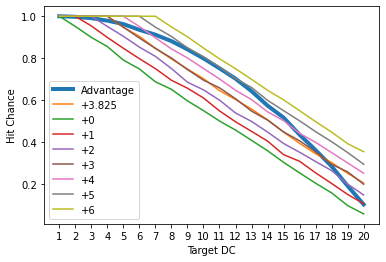

In [541]:
import matplotlib.pyplot as pyplot
import numpy

# show target rolls from 1 to 20
dcs = numpy.array(range(1,21))

# simulate the chances to hit each value with advantage
advantage_hits = numpy.array([ simulate_hitting(i, roll_advantage, 10000) for i in dcs ])

# simulate the chances to hit each value with plus average
plus_hits = numpy.array([ simulate_hitting(i, roll_plus(3.825), 10000) for i in dcs ])

pyplot.plot(dcs, advantage_hits, label="Advantage", linewidth=4)
pyplot.plot(dcs, plus_hits, label="+3.825")

# simulate the chances to hit each value with +0 up to +6
for i in range(0,7):
    hits = numpy.array([ simulate_hitting(j, roll_plus(i), 10000) for j in dcs ])
    pyplot.plot(dcs, hits, label=f"+{i}")

# plot on a pretty graph
pyplot.xticks(dcs)
pyplot.xlabel("Target DC")
pyplot.ylabel("Hit Chance")
pyplot.legend()

pyplot.show()


### Advantage is more like a +5 if you have to roll a 10, 11 or 12 (a lot of D&D rolls are around there).
### But more like a +1 if you need a 20.
#### Also note that +3.825 is identical to +3 in every way because the boundary between success and failure is always a whole integer.